# 1. Introduction

In this project, I will demonstrate my skills in both Python automation and SQL querying. I will use Python to read data from an SQL database, allowing me to showcase my ability to automate tasks and perform data extraction efficiently. Through these SQL queries, I will extract meaningful insights from the database.

In [3]:
import numpy as np
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import os

In [4]:
# Get current wd
current_working_directory = os.getcwd()
path = current_working_directory

database = path + '\database.sqlite'

database

'D:\\Python\\Data Analysis\\database.sqlite'

## 2. Create the Connection
This file is run by SQLite, so we can use SQL commands to check all the tables inside our DB.

In [6]:
conn = sqlite3.connect(database)

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


## 3. Describe the Data
This database contains multiple tables, including players, leagues, countries, etc.

### 3.1 Players
I selected the "Player" table and listed a summary, which gives us a general understanding of the data.

In [9]:
players = pd.read_sql("""SELECT * FROM Player;""", conn)
                      
players     

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154
...,...,...,...,...,...,...,...
11055,11071,26357,Zoumana Camara,2488,1979-04-03 00:00:00,182.88,168
11056,11072,111182,Zsolt Laczko,164680,1986-12-18 00:00:00,182.88,176
11057,11073,36491,Zsolt Low,111191,1979-04-29 00:00:00,180.34,154
11058,11074,35506,Zurab Khizanishvili,47058,1981-10-06 00:00:00,185.42,172


In [10]:
players.describe()

,id,player_api_id,player_fifa_api_id,height,weight
count,11060.000000,11060.000000,11060.000000,11060.000000,11060.000000
mean,5537.511392,156582.427215,165664.910488,181.867445,168.380289
std,3197.692647,160713.700624,58649.928360,6.369201,14.990217
min,1.000000,2625.000000,2.000000,157.480000,117.000000
25%,2767.750000,35555.500000,151889.500000,177.800000,159.000000
50%,5536.500000,96619.500000,184671.000000,182.880000,168.000000
75%,8306.250000,212470.500000,203883.250000,185.420000,179.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000


### 3.2 Countries
We use SELECT and the FROM to list all the countries.

In [12]:
countries = pd.read_sql("""SELECT * FROM Country;""", conn)
countries

,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy
5,13274,Netherlands
6,15722,Poland
7,17642,Portugal
8,19694,Scotland
9,21518,Spain


### 3.3 Leagues 
Here we list all the leagues.

In [14]:
leagues = pd.read_sql("""SELECT * FROM League
                        JOIN Country ON Country.id = League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy
5,13274,13274,Netherlands Eredivisie,13274,Netherlands
6,15722,15722,Poland Ekstraklasa,15722,Poland
7,17642,17642,Portugal Liga ZON Sagres,17642,Portugal
8,19694,19694,Scotland Premier League,19694,Scotland
9,21518,21518,Spain LIGA BBVA,21518,Spain


### 3.4 Teams
List the first 10 teams using their short name.

In [16]:
teams = pd.read_sql("""SELECT * FROM Team
                        ORDER BY team_short_name
                        LIMIT 10;""", conn)
teams

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,49119,9930,434.0,FC Aarau,AAR
1,39393,8485,77.0,Aberdeen,ABE
2,35292,10215,1901.0,Académica de Coimbra,ACA
3,20523,8564,47.0,Milan,ACM
4,11817,8576,614.0,AC Ajaccio,AJA
5,26552,8593,245.0,Ajax,AJA
6,26563,10229,1906.0,AZ,ALK
7,43052,9865,1861.0,UD Almería,ALM
8,35291,10213,NaN,Amadora,AMA
9,43053,9906,240.0,Atlético Madrid,AMA


### 3.5 Matches
We list the match information, and we can see that some of it is represented by IDs. Therefore, we need to use JOIN across multiple tables to retrieve the information in a more readable format.

In [18]:
matches = pd.read_sql("""SELECT * FROM Match;""", conn)

matches.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [19]:
detailed_matches = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches

,id,country_name,league_name,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


## 4. Basic Analysis
We will use some SQL aggregation functions to gain deeper insights into the league and season information.

In [21]:
leagues_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leagues_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


### 4.1 Visualisations

After extracting the data, using a DataFrame to plot the results would be a quick and efficient choice.

<Axes: title={'center': 'Average Goals per Game Over Time'}>

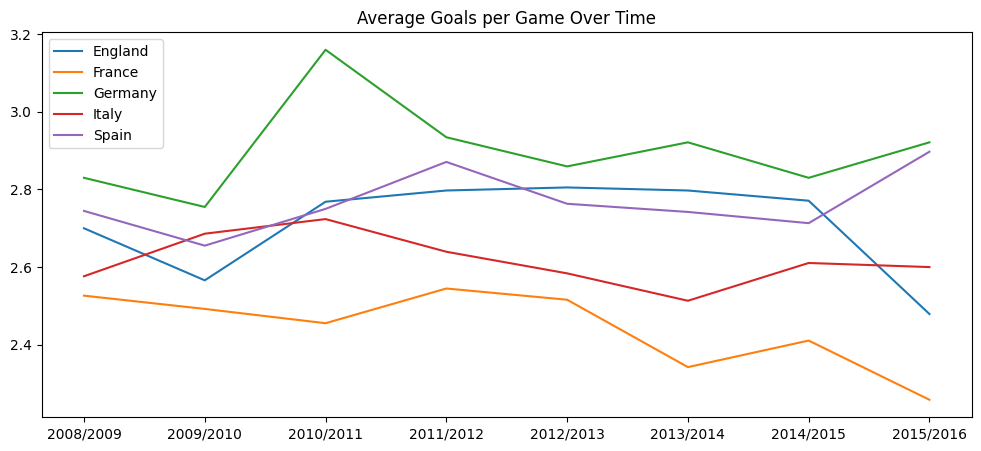

In [24]:
df = pd.DataFrame(index=np.sort(leagues_season['season'].unique()), columns=leagues_season['country_name'].unique())

df.loc[:,'Germany'] = list(leagues_season.loc[leagues_season['country_name']=='Germany','avg_goals'])
df.loc[:,'Spain']   = list(leagues_season.loc[leagues_season['country_name']=='Spain','avg_goals'])
df.loc[:,'France']   = list(leagues_season.loc[leagues_season['country_name']=='France','avg_goals'])
df.loc[:,'Italy']   = list(leagues_season.loc[leagues_season['country_name']=='Italy','avg_goals'])
df.loc[:,'England']   = list(leagues_season.loc[leagues_season['country_name']=='England','avg_goals'])

df.plot(figsize=(12,5),title='Average Goals per Game Over Time')

<Axes: title={'center': 'Average Goals Difference Home vs Out'}>

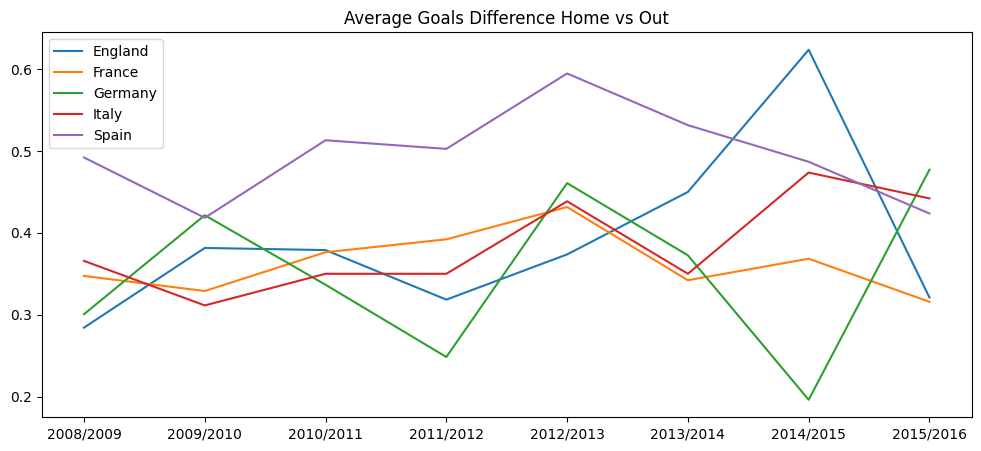

In [25]:
df = pd.DataFrame(index=np.sort(leagues_season['season'].unique()), columns=leagues_season['country_name'].unique())

df.loc[:,'Germany'] = list(leagues_season.loc[leagues_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leagues_season.loc[leagues_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leagues_season.loc[leagues_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leagues_season.loc[leagues_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leagues_season.loc[leagues_season['country_name']=='England','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

### 4.2 Analysis on Players Height

In [27]:
players_height = pd.read_sql("""SELECT CASE
                                            WHEN ROUND(height)<165 then 165
                                            WHEN ROUND(height)>195 then 195
                                            ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (AVG(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (AVG(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        AVG(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        AVG(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


<Axes: title={'center': 'Potential vs Height'}, xlabel='calc_height'>

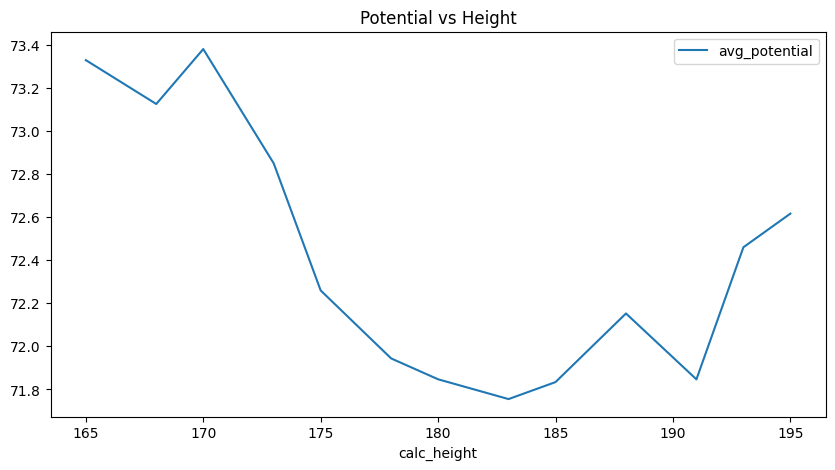

In [28]:
players_height.plot(x='calc_height',y='avg_potential',figsize=(10,5),title='Potential vs Height')

<Axes: title={'center': 'Weight vs Height'}, xlabel='calc_height'>

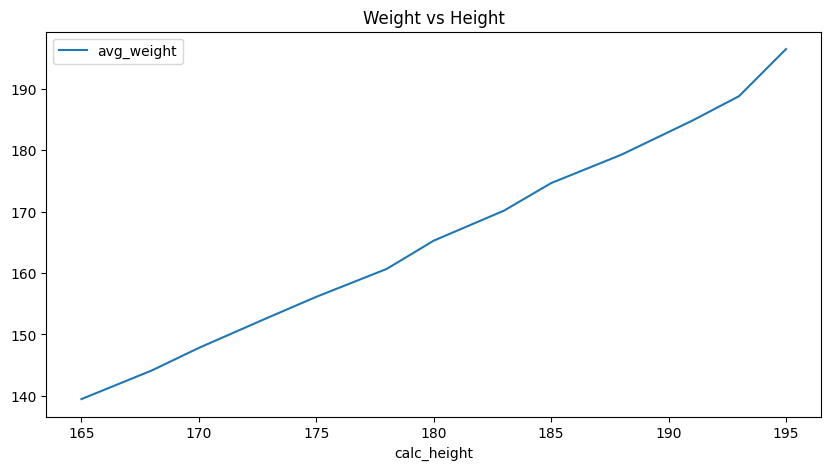

In [29]:
players_height.plot(x='calc_height',y='avg_weight',figsize=(10,5),title='Weight vs Height')

## 5. Other Functions
Here we try ywo different ways to count the number of each distribution. One is using SQL query, and the other one is using the pandas function to count the query result.

In [31]:
players_height2 = pd.read_sql("""SELECT ROUND(height) AS cal_height
                                        FROM Player
                                       ;""", conn)

players_height2

,cal_height
0,183.0
1,170.0
2,170.0
3,183.0
4,183.0
...,...
11055,183.0
11056,183.0
11057,180.0
11058,185.0


In [32]:
players_height_count = pd.read_sql("""SELECT ROUND(height) AS cal_height,
                                        COUNT(*) AS Count
                                        FROM Player
                                        GROUP BY cal_height
                                       ;""", conn)

players_height_count

,cal_height,Count
0,157.0,1
1,160.0,2
2,163.0,9
3,165.0,62
4,168.0,118
5,170.0,403
6,173.0,530
7,175.0,1188
8,178.0,1489
9,180.0,1388


In [33]:
players_height2.groupby('cal_height').size().reset_index(name='people')

,cal_height,people
0,157.0,1
1,160.0,2
2,163.0,9
3,165.0,62
4,168.0,118
5,170.0,403
6,173.0,530
7,175.0,1188
8,178.0,1489
9,180.0,1388
